In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from czid_visualization.amr import read_report, heatmap, util

%matplotlib inline

In [382]:
#load CZID-specific font for continuity for default theme

import matplotlib.font_manager as font_manager
font_dirs = ['../fonts/Open_Sans']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams["font.family"] = "Open Sans"

In [383]:
# Update this parameter (as needed) to specify your own input data filename.
# For most cases, leaving this as-is should be fine.

amr_results_file = '../example_data/combined_amr_results.csv'

In [384]:
METRIC = 'max_breadth'

MIN_NUM_CONTIGS = 0
CUTOFF_LIST = ['Strict', 'Perfect', 0]
MIN_CONTIG_COV = 0
MIN_CONTIG_PID = 0
MIN_NUM_READS = 0
MIN_READ_COV = 0
MIN_READ_DEPTH = 0
MIN_RPM = 0
MIN_DPM = 0
DRUG_CLASS_LIST = [] # example: ['aminoglycoside antibiotic', 'aminocoumarin antibiotic']

TOP_N = 10
LOG_TRANSFORM = False
FIGURE_SIZE = (10,15)

pd.set_option('display.max_rows', 5) # set the # of data table rows will be shown in the notebook

In [385]:
filtered_amr_df = read_report.read_amr_czid_report(
    amr_results_file, 
    num_contigs_cutoff = MIN_NUM_CONTIGS, 
    cutoff_list = CUTOFF_LIST,
    contig_cov_breadth_cutoff = MIN_CONTIG_COV,
    contig_percent_id_cutoff = MIN_CONTIG_PID,
    num_reads_cutoff = MIN_NUM_READS,
    read_coverage_breadth_cutoff = MIN_READ_COV,
    read_coverage_depth_cutoff = MIN_READ_DEPTH,
    rpm_cutoff = MIN_RPM,
    dpm_cutoff = MIN_DPM,
    drug_class_list = DRUG_CLASS_LIST,
    split_drug_class = True
)


filtered_amr_df

,gene_name,sample_name,gene_family,drug_class,resistance_mechanism,model_type,num_contigs,cutoff,contig_coverage_breadth,contig_percent_id,contig_species,num_reads,read_coverage_breadth,read_coverage_depth,read_species,total_reads,rpm,dpm,max_breadth
0,aads,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002,ANT(6),aminoglycoside antibiotic,antibiotic inactivation,protein homolog,1,Perfect,99.6528,100.0,Unknown taxonomy (chromosome or plasmid),31.0,100.00,4.69,0,110405192,10.47,1.58,100.00
1,acrd,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002,resistance-nodulation-cell division (RND) anti...,aminoglycoside antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,3.0,13.90,0.10,0,110405192,1.01,0.03,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,teta(60),AMR_TR-DNA-NOVA042518_2-pre_S112,ATP-binding cassette (ABC) antibiotic efflux pump,tetracycline antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,2.0,17.24,0.17,0,10000000,0.76,0.06,17.24
1602,teta(p),AMR_TR-DNA-NOVA042518_2-pre_S112,major facilitator superfamily (MFS) antibiotic...,tetracycline antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,13.0,5.54,0.04,0,10000000,4.95,0.02,5.54


In [386]:
plot_data_by_genes = pd.pivot_table(filtered_amr_df, values=METRIC, index='gene_name', columns='sample_name')
plot_data_by_genes

sample_name,AMR_TR-DNA-NOVA042518_1-30d_S110,AMR_TR-DNA-NOVA042518_1-6mo_S111,AMR_TR-DNA-NOVA042518_1-pre_S108,AMR_TR-DNA-NOVA042518_1-pst_S109,AMR_TR-DNA-NOVA042518_2-6mo_S115,AMR_TR-DNA-NOVA042518_2-pre_S112,AMR_TR-DNA-NOVA042518_2-z30d_S113,AMR_TR-DNA-NOVA042518_2-zpst_S114,AMR_TR-DNA-NOVA1-03-pre_S54,AMR_TR-DNA-NOVA1-03-pst_S55,...,AMR_TR-DNA-NOVA1-08-pst_S72,AMR_TR-DNA-NOVA1-09-30d_S77,AMR_TR-DNA-NOVA1-09-6mo_S78,AMR_TR-DNA-NOVA1-09-zpre_S76,AMR_TR-DNA-NOVA1-09-zpst_S75,AMR_TR-DNA-NOVA1-10-30d_S81,AMR_TR-DNA-NOVA1-10-pre_S79,AMR_TR-DNA-NOVA1-10-pst_S80,OPS_009_UTAH_ESBL_DNA_3-30d_S128_L002,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002
gene_name,,,,,,,,,,,,,,,,,,,,,
aac(3)-iid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.63,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.68,NaN,NaN
aac(3)-iv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.91,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoji,NaN,NaN,NaN,15.21,NaN,NaN,15.27,33.39,NaN,79.01,...,2.74,NaN,NaN,NaN,27.8,NaN,NaN,49.64,NaN,NaN
yrc-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.48,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(62, 36)


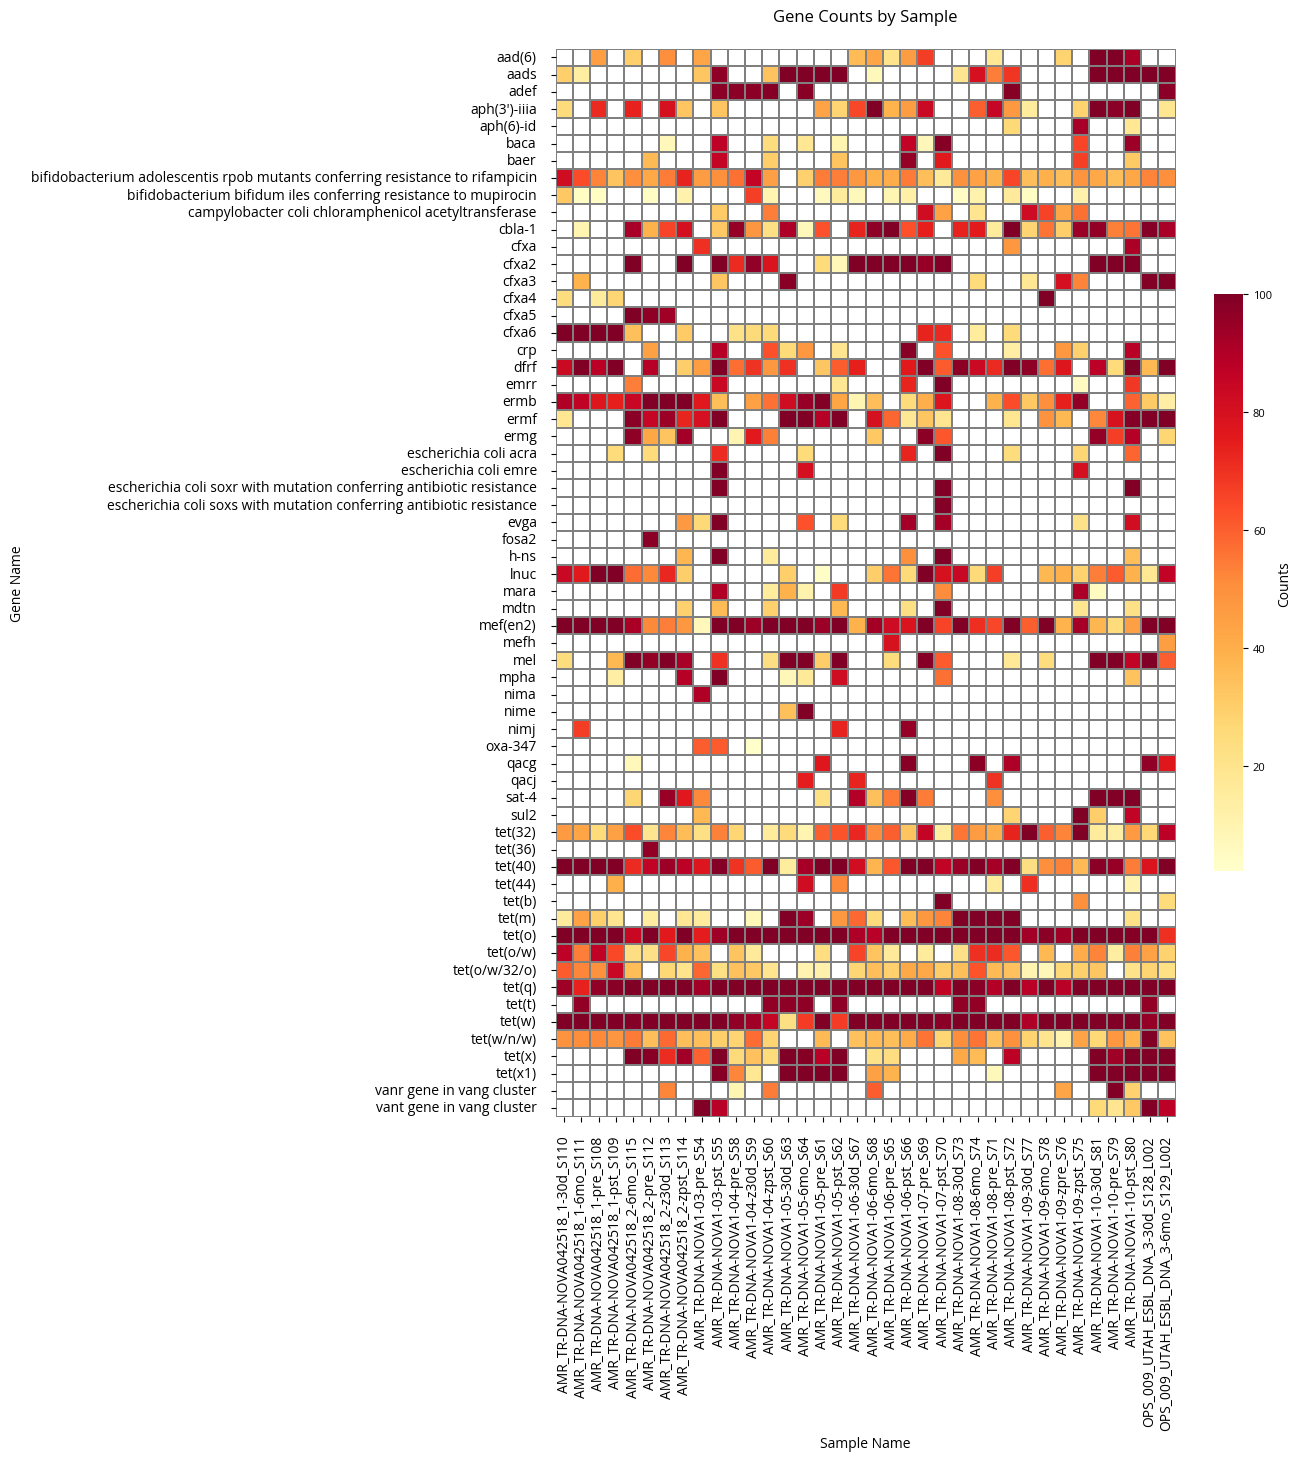

In [387]:
plt = heatmap.plot_czid_heatmap(
    plot_data_by_genes,
    title = "Gene Counts by Sample",
    legend_label="Counts",
    top_n = TOP_N, 
    sort_values = True, 
    figure_size = FIGURE_SIZE, 
    log = LOG_TRANSFORM, 
)
# plt.savefig(output_filename)
plt.show()

In [388]:
plot_data_by_drug_class = pd.pivot_table(
    util.format_drug_class(filtered_amr_df), 
    values='gene_name', 
    index='drug_class_split', 
    columns='sample_name', 
    aggfunc = 'count'
)
plot_data_by_drug_class

(1603, 19)
3084
(3084, 20)


sample_name,AMR_TR-DNA-NOVA042518_1-30d_S110,AMR_TR-DNA-NOVA042518_1-6mo_S111,AMR_TR-DNA-NOVA042518_1-pre_S108,AMR_TR-DNA-NOVA042518_1-pst_S109,AMR_TR-DNA-NOVA042518_2-6mo_S115,AMR_TR-DNA-NOVA042518_2-pre_S112,AMR_TR-DNA-NOVA042518_2-z30d_S113,AMR_TR-DNA-NOVA042518_2-zpst_S114,AMR_TR-DNA-NOVA1-03-pre_S54,AMR_TR-DNA-NOVA1-03-pst_S55,...,AMR_TR-DNA-NOVA1-08-pst_S72,AMR_TR-DNA-NOVA1-09-30d_S77,AMR_TR-DNA-NOVA1-09-6mo_S78,AMR_TR-DNA-NOVA1-09-zpre_S76,AMR_TR-DNA-NOVA1-09-zpst_S75,AMR_TR-DNA-NOVA1-10-30d_S81,AMR_TR-DNA-NOVA1-10-pre_S79,AMR_TR-DNA-NOVA1-10-pst_S80,OPS_009_UTAH_ESBL_DNA_3-30d_S128_L002,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002
drug_class_split,,,,,,,,,,,,,,,,,,,,,
aminocoumarin antibiotic,1.0,NaN,NaN,3.0,NaN,7.0,1.0,4.0,NaN,8.0,...,3.0,NaN,NaN,NaN,7.0,NaN,1.0,7.0,NaN,NaN
aminoglycoside antibiotic,2.0,2.0,4.0,3.0,3.0,5.0,2.0,7.0,5.0,9.0,...,7.0,2.0,NaN,2.0,9.0,9.0,5.0,18.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sulfonamide antibiotic,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN
tetracycline antibiotic,13.0,16.0,13.0,22.0,12.0,22.0,13.0,20.0,17.0,29.0,...,21.0,9.0,9.0,10.0,23.0,16.0,16.0,28.0,17.0,20.0


(24, 36)


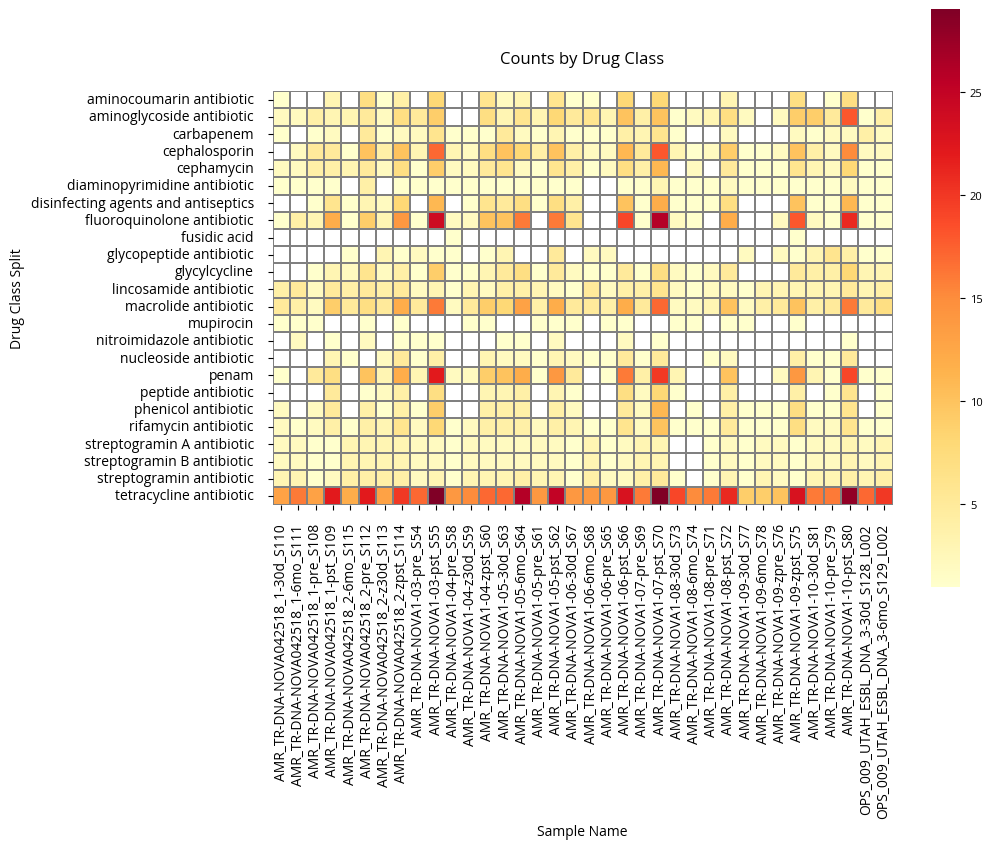

In [389]:
plt = heatmap.plot_czid_heatmap(
    plot_data_by_drug_class.loc[plot_data_by_drug_class.index.sort_values()],
    title="Counts by Drug Class",
    top_n = TOP_N, 
    sort_values = True, 
    figure_size = FIGURE_SIZE, 
    log = LOG_TRANSFORM, 

)

plt.show()

(24, 36)


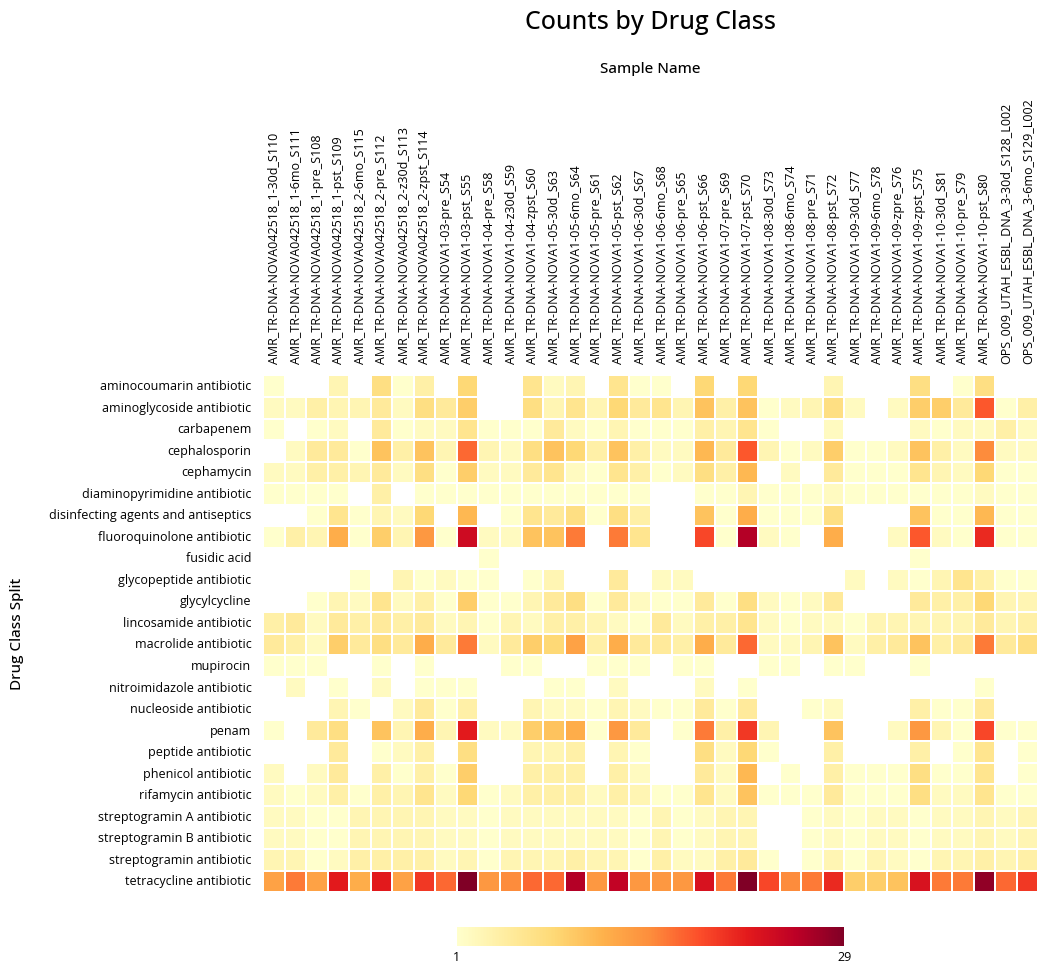

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_czid_heatmap_default_theme(
    df,
    title="",
    x_axis_title="",
    y_axis_title="",
    legend_label="",
    color_palette="YlOrRd",
    top_n=25, 
    figure_size=(8,8), 
    log=False, 
    sort_values = True, 
    ):
    
    '''
    Plot the final heatmap
    '''
    
    plot_df = df
    
    x = plot_df.unstack().groupby(level=0, group_keys=False).nlargest(top_n).to_frame()
    all_top_n_taxa = list(set([i[1] for i in x.index]))
    plot_df = plot_df.loc[all_top_n_taxa]  # filter the plot data to only include taxa in the top_n
    print(plot_df.shape)
    
    if sort_values:
        plot_df.sort_index(inplace=True)
    
    # Apply log-scale to value
    if(log):
        plot_df = np.log(plot_df + 1)
        
    # Set CZ ID color pallette - yellow to orange to red
    czid_colors = sns.color_palette(color_palette, as_cmap=True)  
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=figure_size)
    ax = sns.heatmap(
        plot_df, 
        cmap=czid_colors, 
        linewidths=0.1, 
        square=True, 
        xticklabels=True, 
        yticklabels=True, 
        ax=ax, 
        cbar_kws = { # position + format size of colorbar
            "location":"bottom",
            "pad": 0.03, 
            "shrink": 0.5, 
            "aspect": 20
        }
    )
    
    # Adjust the colorbar's ticks and labels
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(
        labelsize=9, # set tick label size
        size=0 # set tick-marks to be non-existent
    )
    def fmt(x): # function to remove extraneous 0s from colorbar legend labels
        s = f"{x:.2f}" # if label values aren't integers, show 2 decimal places
        if s.endswith("0"):
            s = f"{x:.0f}" # otherwise only show integer (sans trailing 0s)
        return f"{s}"
    cbar.set_ticks(
        ticks=[np.min(df), np.max(df)], # scales the colorbar according to min and max values within provided data
        labels=[fmt(np.min(df)), fmt(np.max(df))] # sets labels for colorbar to be at both ends only, per line above
    )
    
    # Adjust axis tick marks + labels
    ax.tick_params(
        axis='x', 
        which='major', 
        pad=5, # padding between x-axis tick-labels and heatmap grid
        labeltop=True, # move x-axis tick-labels to top
        top=False, # remove tick marks
        labelbottom=False, # no x-axis tick-labels on bottom
        bottom=False # no x-axis tick marks on bottom
    )
    ax.tick_params(
        axis='y', 
        which='major', 
        pad=5, # padding between y-axis labels and heatmap grid
        left = False # remove tick marks
    )
    plt.xticks(fontsize=9, rotation="vertical")
    plt.yticks(fontsize=9)
    
    # Add title and axis labels
    plt.title(title, pad=24, fontsize=18, fontweight="500")
    
    if not x_axis_title:
        x_axis_title=plot_df.columns.name.replace("_", " ").title()

    if not y_axis_title:
        y_axis_title=plot_df.index.name.replace("_", " ").title()
        
    ax.xaxis.set_label_position('top') # move x-axis label to top, to be with x-axis tick-labels
    
    plt.xlabel( # instantiate + format x-axis label
        x_axis_title, 
        labelpad=18, 
        fontsize=11, 
        fontweight="500"
    )
    plt.ylabel( # instantiate + format y-axis label
        y_axis_title, 
        labelpad=18, 
        fontsize=11, 
        fontweight="500"
    )

    return plt

plt = plot_czid_heatmap_default_theme(
    plot_data_by_drug_class.loc[plot_data_by_drug_class.index.sort_values()],
    title="Counts by Drug Class",
    top_n = TOP_N, 
    sort_values = True, 
    figure_size = FIGURE_SIZE, 
    log = LOG_TRANSFORM, 

)

plt.show()